<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EB%B0%9C%EB%8B%AC%EC%83%81%EA%B6%8C_%EB%A7%A4%EC%B6%9C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 발달상권에 해당하는 경우만 보자

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np

In [ ]:
sales = pd.read_csv("./raw data/서울시 우리마을가게 상권분석서비스(상권-추정매출).csv", encoding='cp949')
standard = pd.read_csv("./참고 파일/광진구 상권.csv")

In [ ]:
sales.columns

Index(['기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율',
       '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율',
       '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율',
       '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율',
       '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액',
       '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
       '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요

In [ ]:
standard.columns

Index(['시군구명', '행정동명', '상권_구분_코드_명', '상권_코드_명', '경도', '위도', '엑스좌표_값', '와이좌표_값',
       '행정동코드', '상권_코드', '상권_구분_코드', '법정동명'],
      dtype='object')

In [ ]:
df = sales.merge(standard, how = 'inner') #광진구
df.head()

,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,...,연령대_60_이상_매출_건수,점포수,시군구명,행정동명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,법정동명
0,4,R,전통시장,2130084,신성시장(신성골목시장),CS300027,섬유제품,276735174.0,2749,73,...,899,*,광진구,중곡제4동,127.086518,37.560786,207830,450949,11215770,중곡동
1,4,R,전통시장,2130084,신성시장(신성골목시장),CS300022,화장품,206885046.0,5285,79,...,2996,4,광진구,중곡제4동,127.086518,37.560786,207830,450949,11215770,중곡동
2,4,R,전통시장,2130084,신성시장(신성골목시장),CS300018,의약품,365734454.0,26679,83,...,9017,3,광진구,중곡제4동,127.086518,37.560786,207830,450949,11215770,중곡동
3,4,R,전통시장,2130084,신성시장(신성골목시장),CS300016,안경,122812437.0,1337,82,...,276,*,광진구,중곡제4동,127.086518,37.560786,207830,450949,11215770,중곡동
4,4,R,전통시장,2130084,신성시장(신성골목시장),CS300014,신발,46172692.0,1774,73,...,842,*,광진구,중곡제4동,127.086518,37.560786,207830,450949,11215770,중곡동


In [ ]:
hotplace = df[df['상권_구분_코드_명'] == '발달상권'].reset_index(drop=True) #광진구 내 발달상권
hotplace.head() #연도는 2022로 전부 동일

,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,...,연령대_60_이상_매출_건수,점포수,시군구명,행정동명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,법정동명
0,4,D,발달상권,2120061,올림픽대교북단,CS300028,화초,2.004173e+07,645,87,...,101,*,광진구,구의제3동,127.093719,37.544562,208468,449149,11215870,구의동
1,4,D,발달상권,2120061,올림픽대교북단,CS300027,섬유제품,3.854027e+08,1564,63,...,333,*,광진구,구의제3동,127.093719,37.544562,208468,449149,11215870,구의동
2,4,D,발달상권,2120061,올림픽대교북단,CS300022,화장품,1.417230e+07,543,83,...,79,3,광진구,구의제3동,127.093719,37.544562,208468,449149,11215870,구의동
3,4,D,발달상권,2120061,올림픽대교북단,CS300021,문구,1.924135e+08,20995,82,...,1016,*,광진구,구의제3동,127.093719,37.544562,208468,449149,11215870,구의동
4,4,D,발달상권,2120061,올림픽대교북단,CS300018,의약품,2.927050e+09,261445,82,...,51118,6,광진구,구의제3동,127.093719,37.544562,208468,449149,11215870,구의동


In [ ]:
hotplace.columns

Index(['기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율',
       '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율',
       '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율',
       '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율',
       '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액',
       '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
       '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요

In [ ]:
def store_service(raw, num): #구찮아서 함수 만듦...
    df = raw[raw['기준_분기_코드'] == num].copy()
    df = df.groupby(['상권_코드_명', '서비스_업종_코드_명']).agg({'분기당_매출_금액': 'sum'}).reset_index(drop=False)

    # 상권은 행, 업종은 컬럼, 매출 금액은 value
    df = df.pivot(index='상권_코드_명', columns='서비스_업종_코드_명', values='분기당_매출_금액')
    df.fillna(0, inplace=True)
    df['전체 매출'] = df.sum(axis=1, numeric_only=True) #상권의 전체 매출 계산

    col = list(df.columns)
    for c in col: # ratio 열 생성
        if c != "전체 매출":
            df[f'ratio_{c}'] = df[c] / df['전체 매출'] * 100

    col = list(df.columns)
    for c in col: # ratio 컬럼만 저장
        if "ratio" not in c:
            df.drop([c], axis=1, inplace=True)

    df.reset_index(drop=False, inplace=True)
    df['매출 최대 비율'] = df.max(axis=1, numeric_only=True)
    df['매출 최대 업종'] = np.nan

    col = list(df.columns)
    for i in range(0,9):
        for c in col:
            if ("매출 최대" not in c) and c != "상권_코드_명":
                if df.loc[i, c] == df.loc[i, '매출 최대 비율']: #매출 최대 비율에 해당한다면
                    df.loc[i, '매출 최대 업종'] = c #매출 최대 업종에 컬럼명 삽입

    for i,j in enumerate(df['매출 최대 업종']): #업종명만 남기기
        df.loc[i, '매출 최대 업종'] = j.split("_")[1]

    new_df = df[['상권_코드_명', '매출 최대 비율', '매출 최대 업종']]
    new_df.columns =['상권_코드_명', str(num)+"분기", str(num)+"분기 매출 최대 업종"]
    return new_df

In [ ]:
from functools import reduce

def concat_quart(raw, function):
    fourth = function(raw, 4)
    third = function(raw,3)
    second = function(raw,2)
    first = function(raw, 1)
    dfs = [first, second, third, fourth]
    df = reduce(lambda left, right: pd.merge(left, right, on='상권_코드_명'), dfs) # 상권코드명 기준으로 merge
    return df

In [ ]:
df = concat_quart(hotplace, store_service)
df

,상권_코드_명,1분기,1분기 매출 최대 업종,2분기,2분기 매출 최대 업종,3분기,3분기 매출 최대 업종,4분기,4분기 매출 최대 업종
0,강변역(테크노마트),48.002397,컴퓨터및주변장치판매,35.337696,컴퓨터및주변장치판매,38.192463,컴퓨터및주변장치판매,38.715883,컴퓨터및주변장치판매
1,건대입구역(건대),16.355954,한식음식점,18.663809,한식음식점,19.333606,한식음식점,20.416513,한식음식점
2,구삼강변맛길,24.689038,슈퍼마켓,21.928467,슈퍼마켓,22.956442,슈퍼마켓,23.704242,슈퍼마켓
3,구의사거리,27.096354,철물점,20.886019,조명용품,18.530628,조명용품,34.724728,철물점
4,구의역,23.729103,한식음식점,25.457010,한식음식점,26.881040,한식음식점,28.128271,한식음식점
5,군자역,18.411707,한식음식점,19.957432,한식음식점,21.280810,한식음식점,23.016282,한식음식점
6,아차산역,14.248538,한식음식점,14.257295,일반의류,13.953105,한식음식점,15.680184,한식음식점
7,어린이대공원역,27.377293,한식음식점,27.484695,한식음식점,25.141445,한식음식점,26.157083,한식음식점
8,올림픽대교북단,18.541917,일반의원,19.268224,일반의원,17.526248,일반의원,21.252926,일반의원


In [ ]:
dff = df.drop(['1분기 매출 최대 업종', '2분기 매출 최대 업종', '3분기 매출 최대 업종', '4분기 매출 최대 업종'], axis=1)
dff = pd.melt(dff, id_vars='상권_코드_명', value_name='매출 최대 비율', var_name='기준_분기_코드')
dff['기준_분기_코드'] = dff['기준_분기_코드'].replace("분기", "", regex=True)
dff = dff.astype({"기준_분기_코드":'int'})
dff

,상권_코드_명,기준_분기_코드,매출 최대 비율
0,강변역(테크노마트),1,48.002397
1,건대입구역(건대),1,16.355954
2,구삼강변맛길,1,24.689038
3,구의사거리,1,27.096354
4,구의역,1,23.729103
5,군자역,1,18.411707
6,아차산역,1,14.248538
7,어린이대공원역,1,27.377293
8,올림픽대교북단,1,18.541917
9,강변역(테크노마트),2,35.337696


In [ ]:
dff2 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
dff2 = pd.melt(dff2, id_vars='상권_코드_명', value_name='매출 최대 업종', var_name='기준_분기_코드')
dff2['기준_분기_코드'] = dff2['기준_분기_코드'].replace("분기 매출 최대 업종", "", regex=True)
dff2 = dff2.astype({"기준_분기_코드":'int'})
store_service_df = dff2.merge(dff, how='inner')
store_service_df

,상권_코드_명,기준_분기_코드,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,한식음식점,16.355954
2,구삼강변맛길,1,슈퍼마켓,24.689038
3,구의사거리,1,철물점,27.096354
4,구의역,1,한식음식점,23.729103
5,군자역,1,한식음식점,18.411707
6,아차산역,1,한식음식점,14.248538
7,어린이대공원역,1,한식음식점,27.377293
8,올림픽대교북단,1,일반의원,18.541917
9,강변역(테크노마트),2,컴퓨터및주변장치판매,35.337696


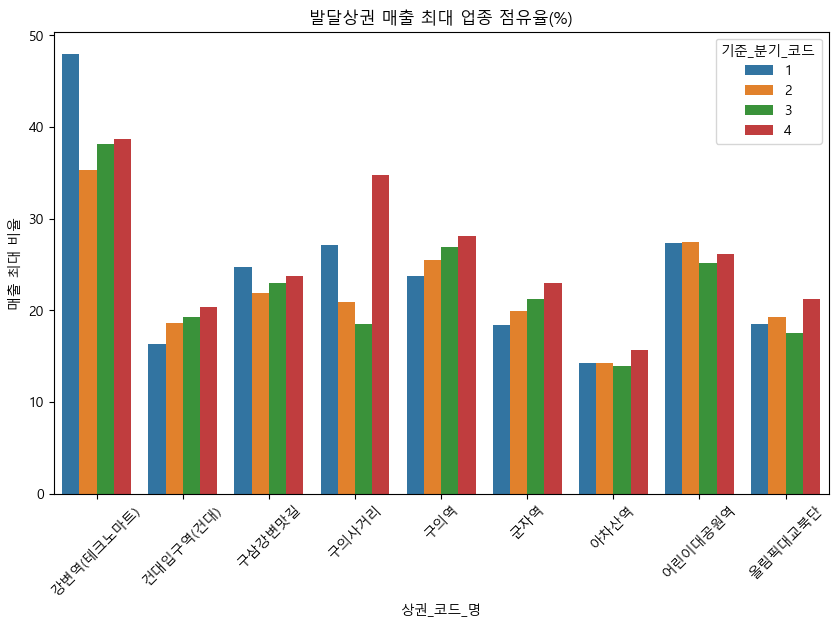

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10,6))
sns.barplot(x='상권_코드_명', y='매출 최대 비율', hue='기준_분기_코드', data=store_service_df)
plt.xticks(rotation=45)
plt.title("발달상권 매출 최대 업종 점유율(%)")
plt.show()

In [ ]:
def store_gender(raw, num): # 각 상권의 주 고객층 성별(분기별)
    hotplace2 = raw[raw['기준_분기_코드'] == num].copy() #해당 분기만
    gender = hotplace2[['상권_코드_명','남성_매출_금액', '여성_매출_금액']].copy()
    gender = gender.groupby('상권_코드_명').agg({'남성_매출_금액':'sum', '여성_매출_금액':'sum'}).reset_index(drop=False) # 각 상권별 성별의 매출액 합계
    gender['전체 매출'] = gender.sum(axis=1, numeric_only=True)
    gender['남성 매출 비율'] = gender['남성_매출_금액'] / gender['전체 매출'] * 100
    gender['여성 매출 비율'] = gender['여성_매출_금액'] / gender['전체 매출'] * 100

    gender2 = gender.drop(['남성_매출_금액','여성_매출_금액', '전체 매출'], axis=1)
    gender2['주 고객 매출 비율'] = gender2.max(axis=1, numeric_only=True)
    gender2['주 고객 성별'] = np.nan

    for i,j in enumerate(gender2['주 고객 매출 비율']):
        if gender2.loc[i, '남성 매출 비율'] == j:
            gender2.loc[i, '주 고객 성별'] = '남성'
        elif gender2.loc[i, '여성 매출 비율'] == j:
            gender2.loc[i, '주 고객 성별'] = '여성'

    gender2.drop(['남성 매출 비율', '여성 매출 비율'], axis=1, inplace=True)
    gender2.columns = ['상권_코드_명', str(num)+"분기", str(num)+"분기 주 고객"]
    return gender2

In [ ]:
df = concat_quart(hotplace, store_gender)
df

,상권_코드_명,1분기,1분기 주 고객,2분기,2분기 주 고객,3분기,3분기 주 고객,4분기,4분기 주 고객
0,강변역(테크노마트),63.663884,남성,58.491909,남성,61.223580,남성,55.699477,남성
1,건대입구역(건대),55.209930,여성,53.935153,여성,54.446074,여성,53.957267,여성
2,구삼강변맛길,50.423037,남성,51.185539,여성,51.471902,여성,51.710050,여성
3,구의사거리,55.659270,남성,53.735063,남성,57.295509,남성,51.355563,남성
4,구의역,58.663593,남성,57.483637,남성,56.206889,남성,59.080689,남성
5,군자역,50.121924,남성,50.814191,남성,51.151227,남성,53.346379,남성
6,아차산역,55.191935,여성,53.138195,여성,54.093615,여성,53.056186,여성
7,어린이대공원역,55.999401,남성,55.919614,남성,53.701996,남성,55.761594,남성
8,올림픽대교북단,55.378963,여성,55.370055,여성,55.542740,여성,55.799757,여성


In [ ]:
dff3 = df.drop(['1분기 주 고객', '2분기 주 고객', '3분기 주 고객', '4분기 주 고객'], axis=1)
dff3 = pd.melt(dff3, id_vars='상권_코드_명', value_name='주 고객 비율', var_name='기준_분기_코드')
dff3['기준_분기_코드'] = dff3['기준_분기_코드'].replace("분기", "", regex=True)
dff3 = dff3.astype({"기준_분기_코드":'int'})
dff3

,상권_코드_명,기준_분기_코드,주 고객 비율
0,강변역(테크노마트),1,63.663884
1,건대입구역(건대),1,55.209930
2,구삼강변맛길,1,50.423037
3,구의사거리,1,55.659270
4,구의역,1,58.663593
5,군자역,1,50.121924
6,아차산역,1,55.191935
7,어린이대공원역,1,55.999401
8,올림픽대교북단,1,55.378963
9,강변역(테크노마트),2,58.491909


In [ ]:
dff4 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
dff4 = pd.melt(dff4, id_vars='상권_코드_명', value_name='주 고객', var_name='기준_분기_코드')
dff4['기준_분기_코드'] = dff4['기준_분기_코드'].replace("분기 주 고객", "", regex=True)
dff4 = dff4.astype({"기준_분기_코드":'int'})
store_gender_df = dff4.merge(dff3, how='inner')
store_gender_df

,상권_코드_명,기준_분기_코드,주 고객,주 고객 비율
0,강변역(테크노마트),1,남성,63.663884
1,건대입구역(건대),1,여성,55.209930
2,구삼강변맛길,1,남성,50.423037
3,구의사거리,1,남성,55.659270
4,구의역,1,남성,58.663593
5,군자역,1,남성,50.121924
6,아차산역,1,여성,55.191935
7,어린이대공원역,1,남성,55.999401
8,올림픽대교북단,1,여성,55.378963
9,강변역(테크노마트),2,남성,58.491909


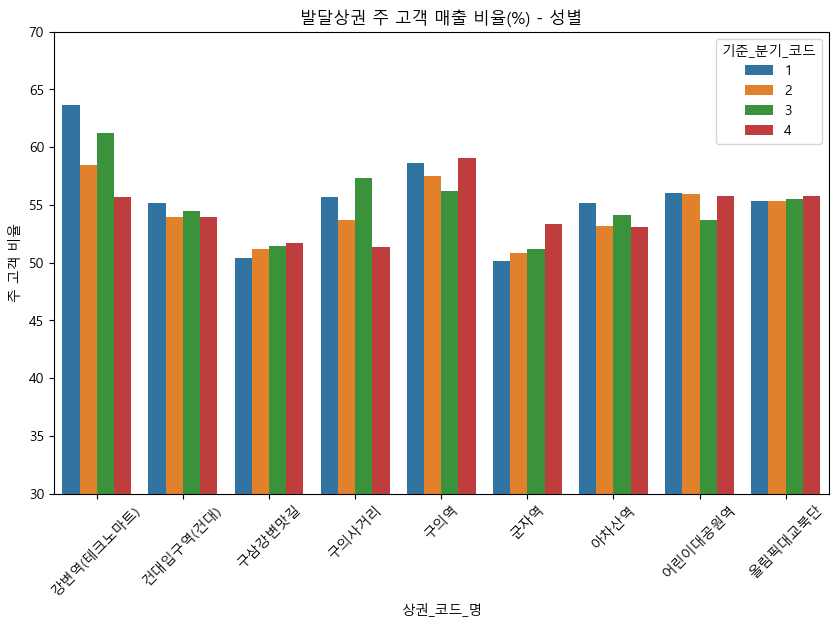

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 고객 비율', hue = '기준_분기_코드', data=store_gender_df)
plt.xticks(rotation=45)
plt.ylim([30,70])
plt.title("발달상권 주 고객 매출 비율(%) - 성별")
plt.show()

In [ ]:
def store_age(raw, num): # 각 상권의 주 고객층 연령대(분기별)
    hotplace2 = raw[raw['기준_분기_코드'] == num].copy() #해당 분기만
    age = hotplace2[['상권_코드_명','연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']].copy()
    age = age.groupby('상권_코드_명').agg({'연령대_10_매출_금액':'sum', '연령대_20_매출_금액':'sum', '연령대_30_매출_금액':'sum', '연령대_40_매출_금액':'sum', '연령대_50_매출_금액':'sum', '연령대_60_이상_매출_금액':'sum'}).reset_index(drop=False) # 각 상권별 성별의 매출액 합계
    age['전체 매출'] = age.sum(axis=1, numeric_only=True)
    age.columns = ['상권_코드_명', '10대', '20대', '30대', '40대', '50대', '60대 이상', '전체 매출']

    col = list(age.columns)
    for c in col: # ratio 열 생성
        if (c != "전체 매출") and (c != "상권_코드_명"):
            age[f'ratio_{c}'] = age[c] / age['전체 매출'] * 100


    age = age.drop(['10대', '20대', '30대', '40대', '50대', '60대 이상', '전체 매출'], axis=1)
    age['주 고객 매출 비율'] = age.max(axis=1, numeric_only=True)
    age['주 고객 연령대'] = np.nan


    col = list(age.columns)
    for i in range(0,9):
        for c in col:
            if ("주 고객" not in c) and (c != "상권_코드_명"):
                if age.loc[i, c] == age.loc[i, '주 고객 매출 비율']: #매출 최대 비율에 해당한다면
                    age.loc[i, '주 고객 연령대'] = c #매출 최대 업종에 컬럼명 삽입

    new_df = age[['상권_코드_명', '주 고객 매출 비율', '주 고객 연령대']]
    for i,j in enumerate(new_df['주 고객 연령대']): #연령대만 남기기
        new_df.loc[i, '주 고객 연령대'] = j.split("_")[1]
    new_df.columns = ['상권_코드_명', str(num)+"분기", str(num)+"분기 주 고객 연령대"]
    return new_df

In [ ]:
df = concat_quart(hotplace, store_age)
df

,상권_코드_명,1분기,1분기 주 고객 연령대,2분기,2분기 주 고객 연령대,3분기,3분기 주 고객 연령대,4분기,4분기 주 고객 연령대
0,강변역(테크노마트),25.959925,50대,26.663049,40대,27.281991,40대,25.709191,40대
1,건대입구역(건대),39.451404,20대,41.380367,20대,41.132434,20대,40.130753,20대
2,구삼강변맛길,25.870133,50대,27.273789,40대,27.760486,40대,27.199022,40대
3,구의사거리,31.277002,60대 이상,30.886958,60대 이상,31.268187,50대,29.227480,60대 이상
4,구의역,23.832437,50대,22.519774,30대,22.235798,30대,21.872785,50대
5,군자역,23.530308,30대,22.377967,30대,22.753940,30대,23.518389,30대
6,아차산역,25.113494,60대 이상,25.623875,60대 이상,24.295713,50대,23.425841,50대
7,어린이대공원역,33.084450,20대,35.593213,20대,32.333306,20대,34.639419,20대
8,올림픽대교북단,41.737239,40대,41.328745,40대,42.856281,40대,43.632385,40대


In [ ]:
dff5 = df.drop(['1분기 주 고객 연령대', '2분기 주 고객 연령대', '3분기 주 고객 연령대', '4분기 주 고객 연령대'], axis=1)
dff5 = pd.melt(dff5, id_vars='상권_코드_명', value_name='주 고객 비율', var_name='기준_분기_코드')
dff5['기준_분기_코드'] = dff5['기준_분기_코드'].replace("분기", "", regex=True)
dff5 = dff5.astype({"기준_분기_코드":'int'})
dff5

,상권_코드_명,기준_분기_코드,주 고객 비율
0,강변역(테크노마트),1,25.959925
1,건대입구역(건대),1,39.451404
2,구삼강변맛길,1,25.870133
3,구의사거리,1,31.277002
4,구의역,1,23.832437
5,군자역,1,23.530308
6,아차산역,1,25.113494
7,어린이대공원역,1,33.084450
8,올림픽대교북단,1,41.737239
9,강변역(테크노마트),2,26.663049


In [ ]:
dff6 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
dff6 = pd.melt(dff6, id_vars='상권_코드_명', value_name='주 고객', var_name='기준_분기_코드')
dff6['기준_분기_코드'] = dff6['기준_분기_코드'].replace("분기 주 고객 연령대", "", regex=True)
dff6 = dff6.astype({"기준_분기_코드":'int'})
store_age_df = dff6.merge(dff5, how='inner')
store_age_df

,상권_코드_명,기준_분기_코드,주 고객,주 고객 비율
0,강변역(테크노마트),1,50대,25.959925
1,건대입구역(건대),1,20대,39.451404
2,구삼강변맛길,1,50대,25.870133
3,구의사거리,1,60대 이상,31.277002
4,구의역,1,50대,23.832437
5,군자역,1,30대,23.530308
6,아차산역,1,60대 이상,25.113494
7,어린이대공원역,1,20대,33.084450
8,올림픽대교북단,1,40대,41.737239
9,강변역(테크노마트),2,40대,26.663049


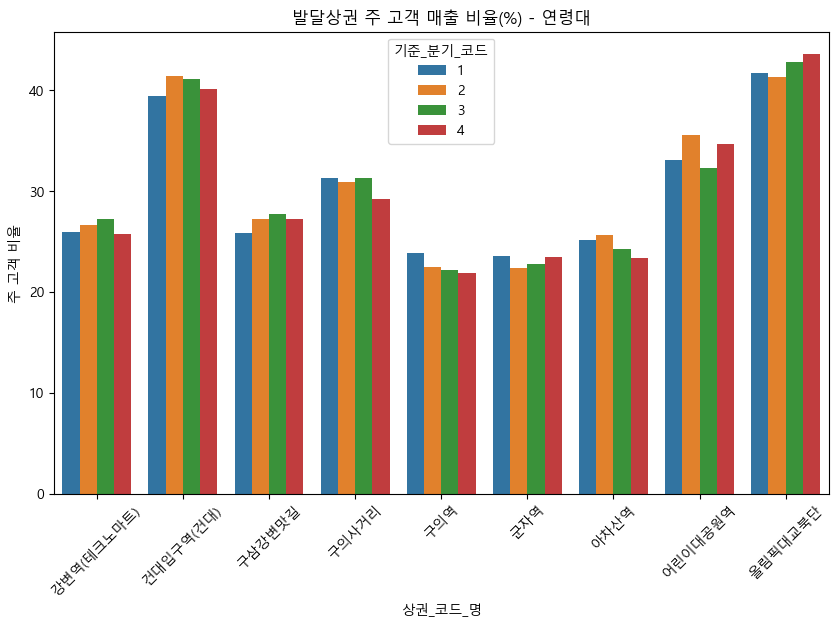

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 고객 비율', hue = '기준_분기_코드', data=store_age_df)
plt.xticks(rotation=45)
plt.title("발달상권 주 고객 매출 비율(%) - 연령대")
plt.show() #건대입구, 올림픽대교북단, 어린이대공원역, 구의사거리의 경우 주 고객 매출 비율이 30% 이상으로 큰 편
# 구의사거리, 구의역, 아차산역의 경우 주 고객 매출 비율이 감소하는 추세

In [ ]:
store_service_dff = store_service_df.merge(hotplace, how='left') # 공통 컬럼인 기준 분기 코드와 상권 코드 명을 기준으로 merge
store_service_dff = store_service_dff[(store_service_dff['서비스_업종_코드_명'] == store_service_dff['매출 최대 업종']) == True].copy() # 매출 최대 업종에 해당하는 경우만
store_service_dff.head()

,상권_코드_명,기준_분기_코드,매출 최대 업종,매출 최대 비율,상권_구분_코드,상권_구분_코드_명,상권_코드,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,...,연령대_60_이상_매출_건수,점포수,시군구명,행정동명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,법정동명
18,강변역(테크노마트),1,컴퓨터및주변장치판매,48.002397,D,발달상권,2120060,CS300003,컴퓨터및주변장치판매,3.812933e+10,...,10216,257,광진구,구의제3동,127.092770,37.537481,208385,448363,11215870,구의동
78,건대입구역(건대),1,한식음식점,16.355954,D,발달상권,2120053,CS100001,한식음식점,1.206064e+10,...,26747,160,광진구,화양동,127.067364,37.543896,206139,449073,11215710,화양동
90,구삼강변맛길,1,슈퍼마켓,24.689038,D,발달상권,2120059,CS300001,슈퍼마켓,5.981566e+09,...,46371,9,광진구,구의제3동,127.090094,37.541691,208148,448830,11215870,구의동
121,구의사거리,1,철물점,27.096354,D,발달상권,2120058,CS300033,철물점,5.341091e+09,...,7603,*,광진구,구의제1동,127.086548,37.547721,207834,449499,11215850,구의동
200,구의역,1,한식음식점,23.729103,D,발달상권,2120056,CS100001,한식음식점,7.302193e+09,...,28674,134,광진구,구의제1동,127.083416,37.539993,207558,448641,11215850,구의동


In [ ]:
df = concat_quart(store_service_dff, store_gender) # 우세업종 주 고객층 성별 분석 : 9개 중 7개 상권의 주 고객층이 남성
df

,상권_코드_명,1분기,1분기 주 고객,2분기,2분기 주 고객,3분기,3분기 주 고객,4분기,4분기 주 고객
0,강변역(테크노마트),70.077168,남성,69.350875,남성,78.173663,남성,66.756822,남성
1,건대입구역(건대),59.759471,남성,58.854100,남성,58.206834,남성,58.310255,남성
2,구삼강변맛길,51.444064,여성,52.577862,여성,54.101133,여성,52.818355,여성
3,구의사거리,57.193420,여성,67.642472,남성,80.260475,남성,51.313881,남성
4,구의역,67.165348,남성,65.747380,남성,66.082640,남성,67.200878,남성
5,군자역,65.605476,남성,63.953835,남성,64.267466,남성,65.579410,남성
6,아차산역,61.488062,남성,65.534071,여성,61.158730,남성,61.922681,남성
7,어린이대공원역,65.415416,남성,66.048017,남성,65.442401,남성,64.279474,남성
8,올림픽대교북단,59.555398,여성,59.792096,여성,60.546719,여성,59.248964,여성


In [ ]:
dff7 = df.drop(['1분기 주 고객', '2분기 주 고객', '3분기 주 고객', '4분기 주 고객'], axis=1)
dff7 = pd.melt(dff7, id_vars='상권_코드_명', value_name='주 고객 비율', var_name='기준_분기_코드')
dff7['기준_분기_코드'] = dff7['기준_분기_코드'].replace("분기", "", regex=True)
dff7 = dff7.astype({"기준_분기_코드":'int'})

In [ ]:
dff8 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
dff8 = pd.melt(dff8, id_vars='상권_코드_명', value_name='주 고객', var_name='기준_분기_코드')
dff8['기준_분기_코드'] = dff8['기준_분기_코드'].replace("분기 주 고객", "", regex=True)
dff8 = dff8.astype({"기준_분기_코드":'int'})
store_gender_df2 = dff8.merge(dff7, how='inner')

In [ ]:
store_service_gender = store_gender_df2.merge(store_service_df, how='inner')
store_service_gender.head()

,상권_코드_명,기준_분기_코드,주 고객,주 고객 비율,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,남성,70.077168,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,남성,59.759471,한식음식점,16.355954
2,구삼강변맛길,1,여성,51.444064,슈퍼마켓,24.689038
3,구의사거리,1,여성,57.193420,철물점,27.096354
4,구의역,1,남성,67.165348,한식음식점,23.729103


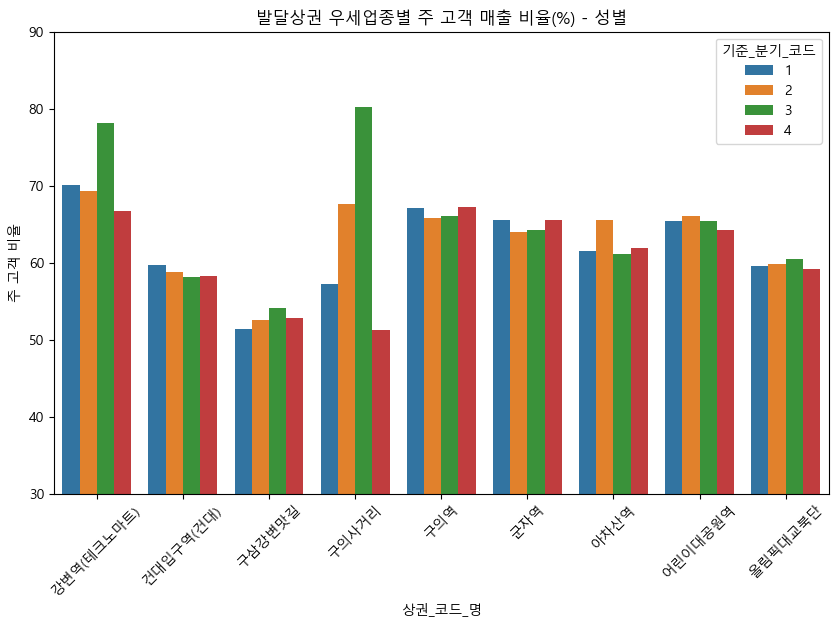

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 고객 비율', hue = '기준_분기_코드', data = store_service_gender)
plt.xticks(rotation=45)
plt.ylim([30,90])
plt.title("발달상권 우세업종별 주 고객 매출 비율(%) - 성별")
plt.show() # 건대입구역, 구삼강변맛길을 제외한 발달상권에서는 주 고객의 매출 비중이 60% 이상으로 큰 편

In [ ]:
df = concat_quart(store_service_dff, store_age) # 우세업종 주 고객층 연령대 분석 : 건대입구역과 어린이대공원은 20대, 구의역과 군자역은 30대, 강변역과 올림픽대교북단은 40대, 구의사거리와 아차산역 60대 이상이 주 고객층
df # 2분기의 아차산역을 제외하고는 변화가 없었음

,상권_코드_명,1분기,1분기 주 고객 연령대,2분기,2분기 주 고객 연령대,3분기,3분기 주 고객 연령대,4분기,4분기 주 고객 연령대
0,강변역(테크노마트),30.203490,50대,27.540388,40대,27.786245,50대,29.164211,40대
1,건대입구역(건대),46.089104,20대,47.594584,20대,47.917982,20대,46.694729,20대
2,구삼강변맛길,29.859026,50대,31.372530,50대,30.114664,50대,30.022028,50대
3,구의사거리,35.045901,60대 이상,48.378370,50대,42.716205,60대 이상,37.532623,60대 이상
4,구의역,25.207700,30대,27.129266,30대,25.438945,30대,24.928690,30대
5,군자역,27.865689,30대,28.100238,30대,26.918774,30대,26.336724,30대
6,아차산역,24.205437,50대,39.028707,30대,24.953409,50대,23.854760,60대 이상
7,어린이대공원역,44.227883,20대,42.966883,20대,46.551993,20대,45.404317,20대
8,올림픽대교북단,34.066571,40대,32.225755,40대,36.331554,40대,34.187368,40대


In [ ]:
dff9 = df.drop(['1분기 주 고객 연령대', '2분기 주 고객 연령대', '3분기 주 고객 연령대', '4분기 주 고객 연령대'], axis=1)
dff9 = pd.melt(dff9, id_vars='상권_코드_명', value_name='주 고객 비율', var_name='기준_분기_코드')
dff9['기준_분기_코드'] = dff9['기준_분기_코드'].replace("분기", "", regex=True)
dff9 = dff9.astype({"기준_분기_코드":'int'})

dff10 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
dff10 = pd.melt(dff10, id_vars='상권_코드_명', value_name='주 고객', var_name='기준_분기_코드')
dff10['기준_분기_코드'] = dff10['기준_분기_코드'].replace("분기 주 고객 연령대", "", regex=True)
dff10 = dff10.astype({"기준_분기_코드":'int'})
store_age_df2 = dff10.merge(dff9, how='inner')

In [ ]:
store_service_age = store_age_df2.merge(store_service_df, how='inner')
store_service_age.head()

,상권_코드_명,기준_분기_코드,주 고객,주 고객 비율,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,50대,30.203490,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,20대,46.089104,한식음식점,16.355954
2,구삼강변맛길,1,50대,29.859026,슈퍼마켓,24.689038
3,구의사거리,1,60대 이상,35.045901,철물점,27.096354
4,구의역,1,30대,25.207700,한식음식점,23.729103


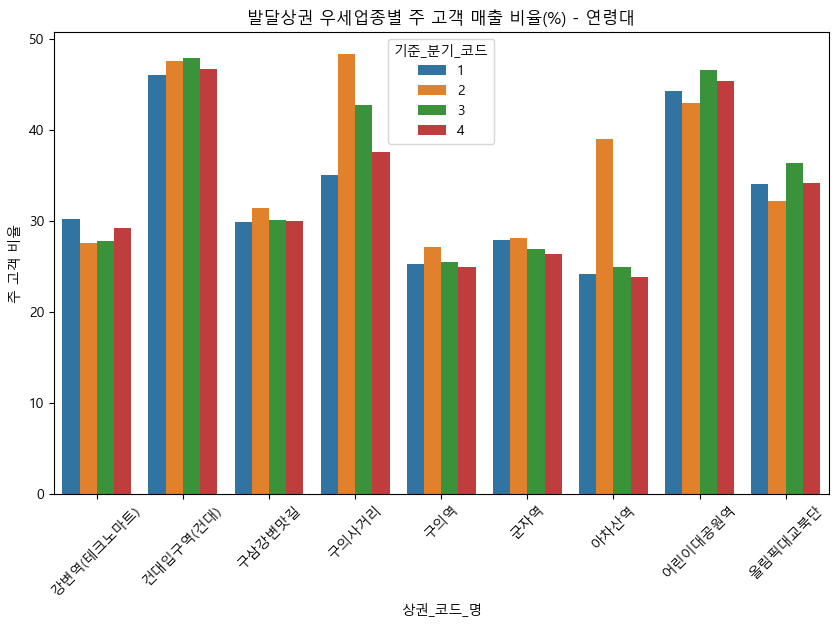

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 고객 비율', hue = '기준_분기_코드', data = store_service_age)
plt.xticks(rotation=45)
plt.title("발달상권 우세업종별 주 고객 매출 비율(%) - 연령대")
plt.show() # 건대입구역, 구의사거리, 어린이대공원역, 올림픽대교북단의 경우 주 고객의 매출 비중이 30% 이상으로 큰 편

In [ ]:
def store_day(raw, num): # 각 상권의 주 매출 요일 분석
    hotplace2 = raw[raw['기준_분기_코드'] == num].copy() #해당 분기만
    day = hotplace2[['상권_코드_명','월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']].copy()
    day = day.groupby('상권_코드_명').sum().reset_index(drop=False) # 각 상권별 요일의 매출액 합계

    day['전체 매출'] = day.sum(axis=1, numeric_only=True)
    day.columns = ['상권_코드_명', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '전체 매출']

    col = list(day.columns)
    for c in col: # ratio 열 생성
        if (c != "전체 매출") and (c != "상권_코드_명"):
            day[f'ratio_{c}'] = day[c] / day['전체 매출'] * 100

    day = day.drop(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '전체 매출'], axis=1)
    day['주 매출 요일 비율'] = day.max(axis=1, numeric_only=True)
    day['주 매출 요일'] = np.nan

    col = list(day.columns)
    for i in range(0,9):
        for c in col:
            if ("ratio" in c):
                if day.loc[i, c] == day.loc[i, '주 매출 요일 비율']: #매출 최대 비율에 해당한다면
                    day.loc[i, '주 매출 요일'] = c #주 매출 요일에 컬럼명 삽입

    new_df = day[['상권_코드_명', '주 매출 요일 비율', '주 매출 요일']]
    for i,j in enumerate(new_df['주 매출 요일']): #연령대만 남기기
        new_df.loc[i, '주 매출 요일'] = j.split("_")[1]
    new_df.columns = ['상권_코드_명', str(num)+"분기", str(num)+"분기 주 매출 요일"]
    return new_df

In [ ]:
df = concat_quart(hotplace, store_day)
df # 대부분 금요일과 토요일의 매출이 높으나, 강변역, 구의사거리, 어린이대공원역의 경우 4개 분기 중 2개 이상의 분기에서 평일의 매출액이 높았다

,상권_코드_명,1분기,1분기 주 매출 요일,2분기,2분기 주 매출 요일,3분기,3분기 주 매출 요일,4분기,4분기 주 매출 요일
0,강변역(테크노마트),18.937890,토요일,16.272292,토요일,17.604967,수요일,16.976644,목요일
1,건대입구역(건대),17.294122,토요일,18.420389,토요일,16.922716,금요일,18.865946,토요일
2,구삼강변맛길,16.017380,목요일,16.055522,토요일,17.319998,금요일,16.782617,토요일
3,구의사거리,18.688050,월요일,18.838098,화요일,19.745514,수요일,19.427189,화요일
4,구의역,16.412813,금요일,16.811795,금요일,17.271718,금요일,16.712402,토요일
5,군자역,16.579664,금요일,16.626169,금요일,17.051852,금요일,18.297227,토요일
6,아차산역,16.751775,월요일,17.860491,금요일,17.466085,금요일,18.026467,토요일
7,어린이대공원역,16.425632,목요일,15.734277,금요일,16.659452,화요일,16.365421,토요일
8,올림픽대교북단,16.464965,토요일,17.212728,금요일,17.923199,금요일,16.996450,토요일


In [ ]:
df2 = df.drop(['1분기 주 매출 요일', '2분기 주 매출 요일', '3분기 주 매출 요일', '4분기 주 매출 요일'], axis=1)
df2 = pd.melt(df2, id_vars='상권_코드_명', value_name='주 매출 요일 비율', var_name='기준_분기_코드')
df2['기준_분기_코드'] = df2['기준_분기_코드'].replace("분기", "", regex=True)
df2 = df2.astype({"기준_분기_코드":'int'})

df3 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df3 = pd.melt(df3, id_vars='상권_코드_명', value_name='주 매출 요일', var_name='기준_분기_코드')
df3['기준_분기_코드'] = df3['기준_분기_코드'].replace("분기 주 매출 요일", "", regex=True)
df3 = df3.astype({"기준_분기_코드":'int'})
store_day_df = df2.merge(df3, how='inner')
store_day_df.head()

,상권_코드_명,기준_분기_코드,주 매출 요일 비율,주 매출 요일
0,강변역(테크노마트),1,18.937890,토요일
1,건대입구역(건대),1,17.294122,토요일
2,구삼강변맛길,1,16.017380,목요일
3,구의사거리,1,18.688050,월요일
4,구의역,1,16.412813,금요일


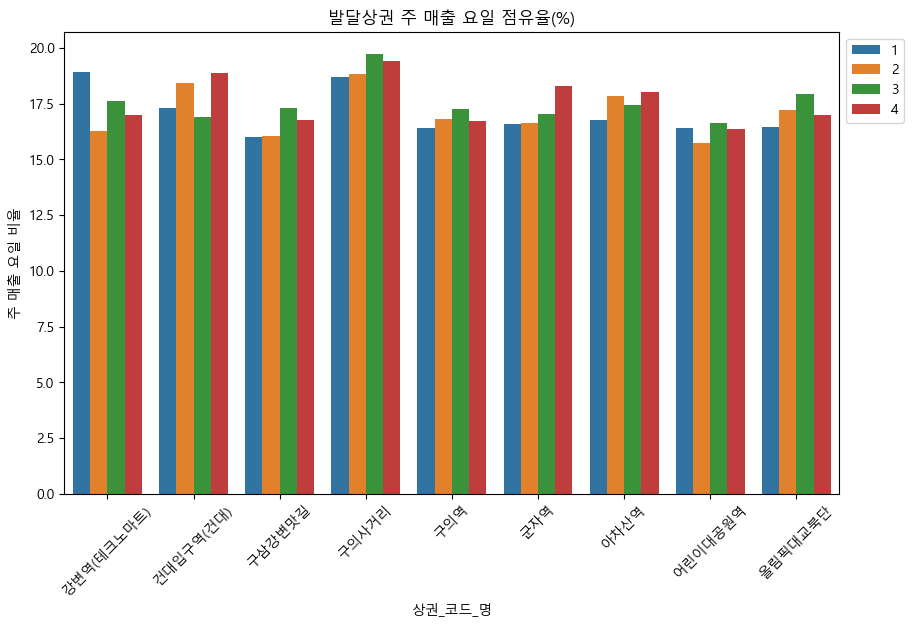

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 요일 비율', hue = '기준_분기_코드', data = store_day_df)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 주 매출 요일 점유율(%)")
plt.show() # 강변역을 제외한 상권에서는 특정 요일의 매출액 점유율이 증가하는 추세

In [ ]:
df = concat_quart(store_service_dff, store_day) # 우세업종 주 매출 요일 분석
df # 전체 데이터의 주 매출 요일을 분석했을 때와 달리, 금요일과 토요일이 주 매출 요일이 아닌 경우가 많다
# 강변역, 구삼강변맛길, 구의사거리, 올림픽대교북단은 2개 이상의 분기에서 금요일이 아닌 평일의 매출액이 높았다

,상권_코드_명,1분기,1분기 주 매출 요일,2분기,2분기 주 매출 요일,3분기,3분기 주 매출 요일,4분기,4분기 주 매출 요일
0,강변역(테크노마트),18.698422,목요일,18.147500,수요일,20.314652,수요일,17.835408,월요일
1,건대입구역(건대),17.904204,토요일,19.094817,토요일,17.812638,토요일,19.514268,토요일
2,구삼강변맛길,15.666030,화요일,15.841692,수요일,16.004635,금요일,15.680406,수요일
3,구의사거리,23.786746,월요일,29.587436,화요일,20.062266,수요일,21.906759,화요일
4,구의역,16.567881,토요일,17.535847,토요일,17.714196,금요일,18.090070,토요일
5,군자역,16.886463,토요일,17.190529,금요일,17.531876,금요일,17.537147,토요일
6,아차산역,18.193152,토요일,22.957614,토요일,17.809437,토요일,19.250304,토요일
7,어린이대공원역,15.657867,금요일,15.651981,토요일,16.925902,금요일,16.268647,토요일
8,올림픽대교북단,19.022415,토요일,19.965099,화요일,18.508269,목요일,19.493713,화요일


In [ ]:
df4 = df.drop(['1분기 주 매출 요일', '2분기 주 매출 요일', '3분기 주 매출 요일', '4분기 주 매출 요일'], axis=1)
df4 = pd.melt(df4, id_vars='상권_코드_명', value_name='주 매출 요일 비율', var_name='기준_분기_코드')
df4['기준_분기_코드'] = df4['기준_분기_코드'].replace("분기", "", regex=True)
df4 = df4.astype({"기준_분기_코드":'int'})

df5 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df5 = pd.melt(df5, id_vars='상권_코드_명', value_name='주 매출 요일', var_name='기준_분기_코드')
df5['기준_분기_코드'] = df5['기준_분기_코드'].replace("분기 주 매출 요일", "", regex=True)
df5 = df5.astype({"기준_분기_코드":'int'})
store_day_df2 = df5.merge(df4, how='inner')

In [ ]:
store_service_day = store_day_df2.merge(store_service_df, how='inner')
store_service_day.head()

,상권_코드_명,기준_분기_코드,주 매출 요일,주 매출 요일 비율,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,목요일,18.698422,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,토요일,17.904204,한식음식점,16.355954
2,구삼강변맛길,1,화요일,15.666030,슈퍼마켓,24.689038
3,구의사거리,1,월요일,23.786746,철물점,27.096354
4,구의역,1,토요일,16.567881,한식음식점,23.729103


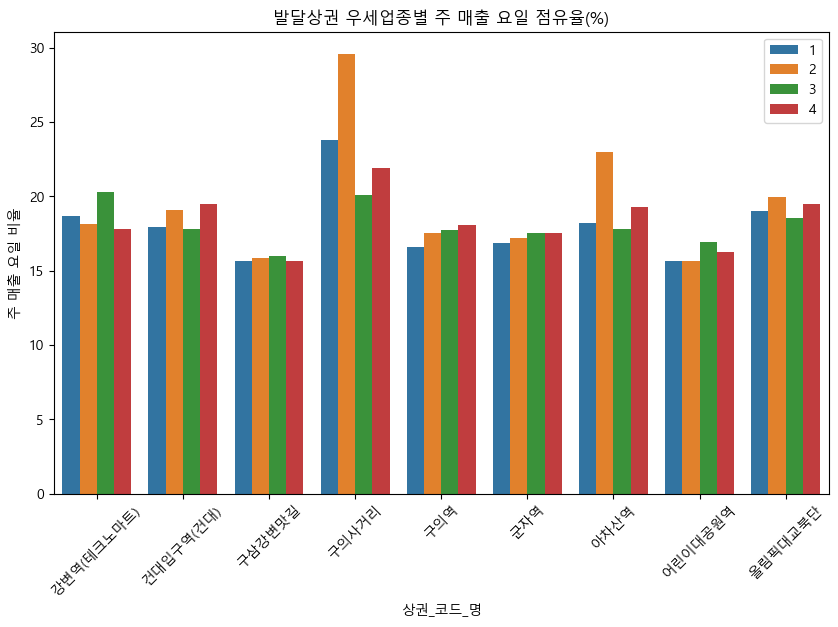

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 요일 비율', hue = '기준_분기_코드', data = store_service_day)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 우세업종별 주 매출 요일 점유율(%)")
plt.show() # 전체 업종과 달리, 구의사거리의 경우 특정 요일의 매출 점유율이 20%를 넘는다
# 강변역, 구의사거리의 경우 특정 요일의 매출액 점유율이 감소하는 추세

In [ ]:
def store_weekend(raw, num): # 각 상권의 주 매출 요일 분석
    hotplace2 = raw[raw['기준_분기_코드'] == num].copy() #해당 분기만
    day = hotplace2[['상권_코드_명','주중_매출_금액', '주말_매출_금액']].copy()
    day = day.groupby('상권_코드_명').sum().reset_index(drop=False) # 각 상권별 요일의 매출액 합계

    day['전체 매출'] = day.sum(axis=1, numeric_only=True)
    day.columns = ['상권_코드_명', '주중', '주말', '전체 매출']

    col = list(day.columns)
    for c in col: # ratio 열 생성
        if (c != "전체 매출") and (c != "상권_코드_명"):
            day[f'ratio_{c}'] = day[c] / day['전체 매출'] * 100

    day = day.drop(['주중', '주말', '전체 매출'], axis=1)
    day['주 매출 요일 비율'] = day.max(axis=1, numeric_only=True)
    day['주 매출 요일'] = np.nan

    col = list(day.columns)
    for i in range(0,9):
        for c in col:
            if ("ratio" in c):
                if day.loc[i, c] == day.loc[i, '주 매출 요일 비율']: #매출 최대 비율에 해당한다면
                    day.loc[i, '주 매출 요일'] = c #주 매출 요일에 컬럼명 삽입

    new_df = day[['상권_코드_명', '주 매출 요일 비율', '주 매출 요일']]
    for i,j in enumerate(new_df['주 매출 요일']): #요일만 남기기
        new_df.loc[i, '주 매출 요일'] = j.split("_")[1]
    new_df.columns = ['상권_코드_명', str(num)+"분기", str(num)+"분기 주 매출 요일"]
    return new_df

In [ ]:
df = concat_quart(hotplace, store_weekend) #전부 주중
df

,상권_코드_명,1분기,1분기 주 매출 요일,2분기,2분기 주 매출 요일,3분기,3분기 주 매출 요일,4분기,4분기 주 매출 요일
0,강변역(테크노마트),65.349131,주중,67.704667,주중,70.738863,주중,72.033329,주중
1,건대입구역(건대),71.342560,주중,69.862780,주중,71.578161,주중,69.325877,주중
2,구삼강변맛길,73.712869,주중,71.856399,주중,74.111744,주중,72.233309,주중
3,구의사거리,79.447459,주중,79.900908,주중,83.243313,주중,80.026000,주중
4,구의역,76.640055,주중,75.405095,주중,76.003136,주중,74.622357,주중
5,군자역,75.508883,주중,74.325534,주중,75.417165,주중,73.111742,주중
6,아차산역,73.835507,주중,72.696713,주중,74.323148,주중,71.533421,주중
7,어린이대공원역,74.218520,주중,73.454701,주중,75.260242,주중,73.269874,주중
8,올림픽대교북단,76.506949,주중,75.488275,주중,78.440776,주중,75.611109,주중


In [ ]:
df2 = df.drop(['1분기 주 매출 요일', '2분기 주 매출 요일', '3분기 주 매출 요일', '4분기 주 매출 요일'], axis=1)
df2 = pd.melt(df2, id_vars='상권_코드_명', value_name='주 매출 요일 비율', var_name='기준_분기_코드')
df2['기준_분기_코드'] = df2['기준_분기_코드'].replace("분기", "", regex=True)
df2 = df2.astype({"기준_분기_코드":'int'})

df3 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df3 = pd.melt(df3, id_vars='상권_코드_명', value_name='주 매출 요일', var_name='기준_분기_코드')
df3['기준_분기_코드'] = df3['기준_분기_코드'].replace("분기 주 매출 요일", "", regex=True)
df3 = df3.astype({"기준_분기_코드":'int'})
store_weekend_df = df2.merge(df3, how='inner')
store_weekend_df.head()

,상권_코드_명,기준_분기_코드,주 매출 요일 비율,주 매출 요일
0,강변역(테크노마트),1,65.349131,주중
1,건대입구역(건대),1,71.342560,주중
2,구삼강변맛길,1,73.712869,주중
3,구의사거리,1,79.447459,주중
4,구의역,1,76.640055,주중


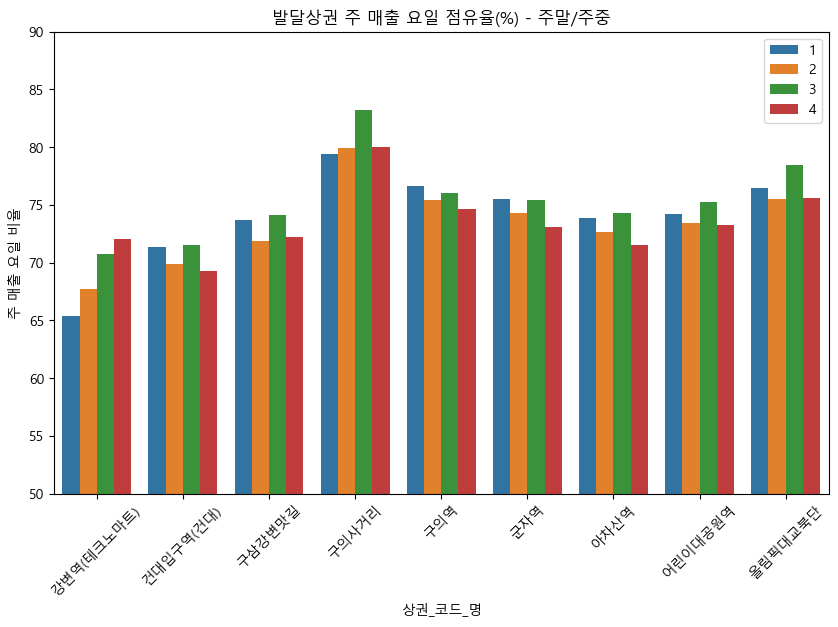

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 요일 비율', hue = '기준_분기_코드', data = store_weekend_df)
plt.xticks(rotation=45)
plt.ylim([50,90])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 주 매출 요일 점유율(%) - 주말/주중")
plt.show() # 강변역을 제외한 상권에서는 주중 매출액 비율이 줄어드는 추세

In [ ]:
df = concat_quart(store_service_dff, store_weekend) #전부 주중
df

,상권_코드_명,1분기,1분기 주 매출 요일,2분기,2분기 주 매출 요일,3분기,3분기 주 매출 요일,4분기,4분기 주 매출 요일
0,강변역(테크노마트),67.890962,주중,73.653299,주중,75.870605,주중,78.336561,주중
1,건대입구역(건대),67.197743,주중,66.284036,주중,67.085708,주중,66.040554,주중
2,구삼강변맛길,70.590075,주중,73.116748,주중,74.809757,주중,72.747462,주중
3,구의사거리,82.589145,주중,83.666324,주중,82.826814,주중,81.984709,주중
4,구의역,71.091191,주중,70.296339,주중,71.909743,주중,69.701573,주중
5,군자역,70.803257,주중,71.379890,주중,70.713969,주중,69.513902,주중
6,아차산역,65.028463,주중,55.559407,주중,67.091145,주중,65.599854,주중
7,어린이대공원역,72.955439,주중,72.436019,주중,71.891898,주중,72.586141,주중
8,올림픽대교북단,80.977585,주중,84.014655,주중,85.647861,주중,83.477453,주중


In [ ]:
df4 = df.drop(['1분기 주 매출 요일', '2분기 주 매출 요일', '3분기 주 매출 요일', '4분기 주 매출 요일'], axis=1)
df4 = pd.melt(df4, id_vars='상권_코드_명', value_name='주 매출 요일 비율', var_name='기준_분기_코드')
df4['기준_분기_코드'] = df4['기준_분기_코드'].replace("분기", "", regex=True)
df4 = df4.astype({"기준_분기_코드":'int'})

df5 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df5 = pd.melt(df5, id_vars='상권_코드_명', value_name='주 매출 요일', var_name='기준_분기_코드')
df5['기준_분기_코드'] = df5['기준_분기_코드'].replace("분기 주 매출 요일", "", regex=True)
df5 = df5.astype({"기준_분기_코드":'int'})
store_weekend_df2 = df5.merge(df4, how='inner')

In [ ]:
store_service_weekend = store_weekend_df2.merge(store_service_df, how='inner')
store_service_weekend.head()

,상권_코드_명,기준_분기_코드,주 매출 요일,주 매출 요일 비율,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,주중,67.890962,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,주중,67.197743,한식음식점,16.355954
2,구삼강변맛길,1,주중,70.590075,슈퍼마켓,24.689038
3,구의사거리,1,주중,82.589145,철물점,27.096354
4,구의역,1,주중,71.091191,한식음식점,23.729103


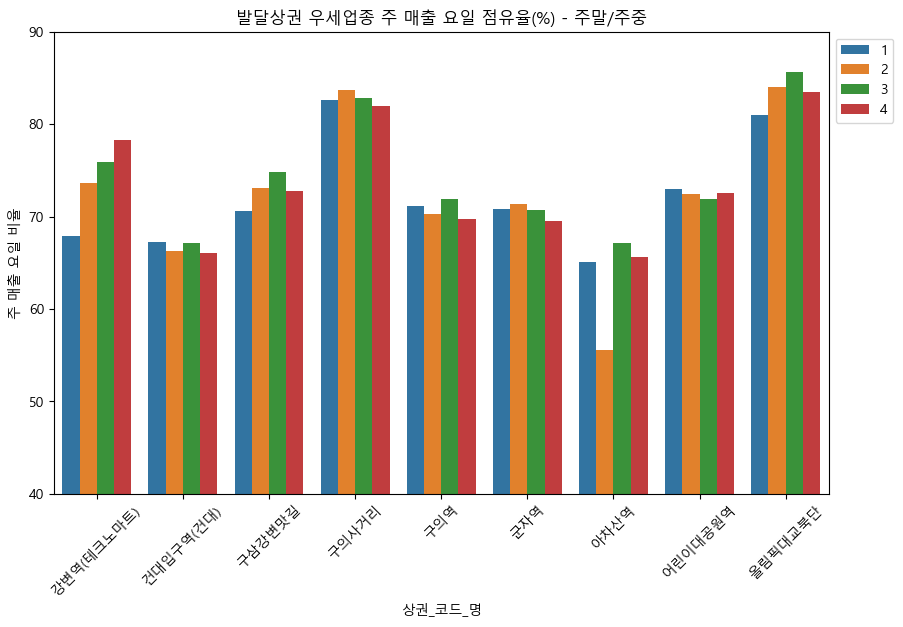

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 요일 비율', hue = '기준_분기_코드', data = store_service_weekend)
plt.xticks(rotation=45)
plt.ylim([40,90])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 우세업종 주 매출 요일 점유율(%) - 주말/주중")
plt.show() # 전체 업종에 대해 분석했을 때와 달리, 주 매출 요일의 점유율이 증가하는 경우가 대부분(건대입구역, 군자역, 구의사거리, 구의역은 감소)

In [ ]:
hotplace.columns

Index(['기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드',
       '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율', '주말_매출_비율',
       '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율',
       '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율',
       '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율',
       '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액',
       '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
       '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',
       '금요

In [ ]:
def store_time(raw, num): # 각 상권의 주 매출 시간대 분석
    hotplace2 = raw[raw['기준_분기_코드'] == num].copy() #해당 분기만
    time = hotplace2[['상권_코드_명','시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']].copy()
    time = time.groupby('상권_코드_명').sum().reset_index(drop=False) # 각 상권별 시간대의 매출액 합계

    time['전체 매출'] = time.sum(axis=1, numeric_only=True)
    time.columns = ['상권_코드_명', '새벽', '오전', '점심', '오후', '저녁', '밤', '전체 매출']

    col = list(time.columns)
    for c in col: # ratio 열 생성
        if (c != "전체 매출") and (c != "상권_코드_명"):
            time[f'ratio_{c}'] = time[c] / time['전체 매출'] * 100

    time = time.drop(['새벽', '오전', '점심', '오후', '저녁', '밤', '전체 매출'], axis=1)
    time['주 매출 시간대 비율'] = time.max(axis=1, numeric_only=True)
    time['주 매출 시간대'] = np.nan

    col = list(time.columns)
    for i in range(0,9):
        for c in col:
            if ("ratio" in c):
                if time.loc[i, c] == time.loc[i, '주 매출 시간대 비율']: #매출 최대 비율에 해당한다면
                    time.loc[i, '주 매출 시간대'] = c #주 매출 요일에 컬럼명 삽입

    new_df = time[['상권_코드_명', '주 매출 시간대 비율', '주 매출 시간대']]
    for i,j in enumerate(new_df['주 매출 시간대']): #시간대만 남기기
        new_df.loc[i, '주 매출 시간대'] = j.split("_")[1]
    new_df.columns = ['상권_코드_명', str(num)+"분기", str(num)+"분기 주 매출 시간대"]
    return new_df

In [ ]:
df = concat_quart(hotplace, store_time)
df #오후-저녁 매출액 비중이 높은 경우가 대부분, 구의사거리의 경우 4개 중 2개 이상의 분기에서 점심의 매출액 비중이 가장 높았다
# 구의사거리 외에는 변화X

,상권_코드_명,1분기,1분기 주 매출 시간대,2분기,2분기 주 매출 시간대,3분기,3분기 주 매출 시간대,4분기,4분기 주 매출 시간대
0,강변역(테크노마트),38.701967,오후,37.096348,오후,38.504650,오후,40.339616,오후
1,건대입구역(건대),40.625491,저녁,34.263726,저녁,34.019837,저녁,33.929604,저녁
2,구삼강변맛길,33.569439,저녁,31.699841,저녁,31.311035,저녁,31.748636,저녁
3,구의사거리,28.994541,점심,26.063286,저녁,26.208603,점심,28.090867,오후
4,구의역,35.165612,저녁,31.165215,저녁,31.313746,저녁,31.889321,저녁
5,군자역,33.954299,저녁,32.834805,저녁,31.887337,저녁,31.490215,저녁
6,아차산역,29.892708,저녁,35.940462,저녁,29.741119,저녁,29.348345,저녁
7,어린이대공원역,40.345794,저녁,34.583451,저녁,33.407937,저녁,34.485180,저녁
8,올림픽대교북단,31.380101,저녁,32.317723,저녁,33.114867,저녁,32.250554,저녁


In [ ]:
df2 = df.drop(['1분기 주 매출 시간대', '2분기 주 매출 시간대', '3분기 주 매출 시간대', '4분기 주 매출 시간대'], axis=1)
df2 = pd.melt(df2, id_vars='상권_코드_명', value_name='주 매출 시간대 비율', var_name='기준_분기_코드')
df2['기준_분기_코드'] = df2['기준_분기_코드'].replace("분기", "", regex=True)
df2 = df2.astype({"기준_분기_코드":'int'})

df3 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df3 = pd.melt(df3, id_vars='상권_코드_명', value_name='주 매출 시간대', var_name='기준_분기_코드')
df3['기준_분기_코드'] = df3['기준_분기_코드'].replace("분기 주 매출 시간대", "", regex=True)
df3 = df3.astype({"기준_분기_코드":'int'})
store_time_df = df2.merge(df3, how='inner')
store_time_df.head()

,상권_코드_명,기준_분기_코드,주 매출 시간대 비율,주 매출 시간대
0,강변역(테크노마트),1,38.701967,오후
1,건대입구역(건대),1,40.625491,저녁
2,구삼강변맛길,1,33.569439,저녁
3,구의사거리,1,28.994541,점심
4,구의역,1,35.165612,저녁


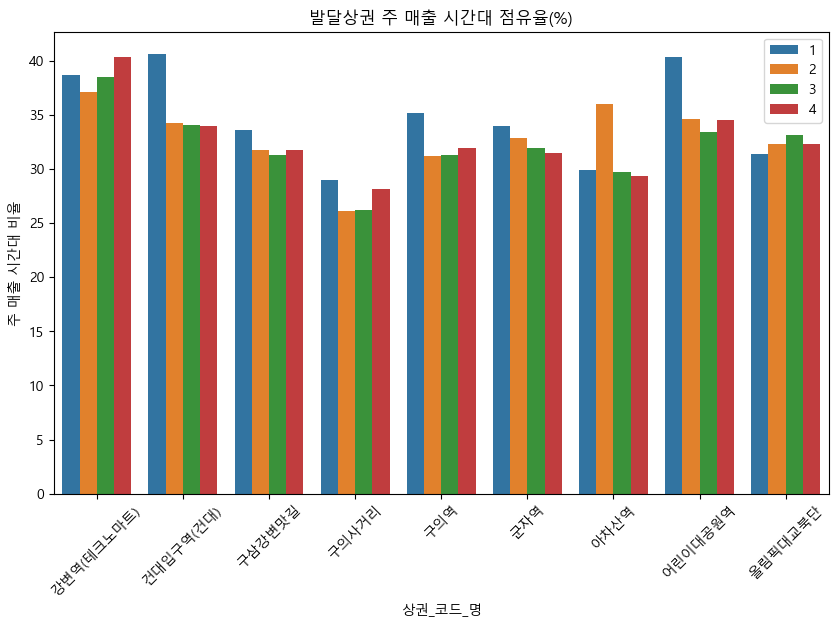

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 시간대 비율', hue = '기준_분기_코드', data = store_time_df)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 주 매출 시간대 점유율(%)")
plt.show() #강변역, 올림픽대교북단을 제외한 상권에서는 특정 시간대의 매출액 점유율이 줄어드는 추세

In [ ]:
df = concat_quart(store_service_dff, store_time) # 우세업종만
df # 변화: 구의사거리, 아차산역
# 구의사거리, 올림픽대교북단의 경우 오전-점심에 주로 매출 발생

,상권_코드_명,1분기,1분기 주 매출 시간대,2분기,2분기 주 매출 시간대,3분기,3분기 주 매출 시간대,4분기,4분기 주 매출 시간대
0,강변역(테크노마트),40.143604,오후,42.474903,오후,41.371479,오후,42.445115,오후
1,건대입구역(건대),53.847725,저녁,39.087285,저녁,38.608873,저녁,39.592308,저녁
2,구삼강변맛길,27.678158,저녁,27.987709,저녁,25.860745,저녁,26.688013,저녁
3,구의사거리,35.889253,점심,33.167034,오전,37.111245,오전,29.081008,점심
4,구의역,56.678330,저녁,46.534115,저녁,45.965437,저녁,46.148789,저녁
5,군자역,56.090945,저녁,48.507069,저녁,48.414207,저녁,48.413918,저녁
6,아차산역,47.300245,저녁,39.683753,오후,44.275143,저녁,42.592283,저녁
7,어린이대공원역,61.088096,저녁,46.339520,저녁,46.536462,저녁,47.396372,저녁
8,올림픽대교북단,33.746296,점심,34.639539,점심,35.075141,점심,37.418926,점심


In [ ]:
df4 = df.drop(['1분기 주 매출 시간대', '2분기 주 매출 시간대', '3분기 주 매출 시간대', '4분기 주 매출 시간대'], axis=1)
df4 = pd.melt(df4, id_vars='상권_코드_명', value_name='주 매출 시간대 비율', var_name='기준_분기_코드')
df4['기준_분기_코드'] = df4['기준_분기_코드'].replace("분기", "", regex=True)
df4 = df4.astype({"기준_분기_코드":'int'})

df5 = df.drop(['1분기', '2분기', '3분기', '4분기'], axis=1)
df5 = pd.melt(df5, id_vars='상권_코드_명', value_name='주 매출 시간대', var_name='기준_분기_코드')
df5['기준_분기_코드'] = df5['기준_분기_코드'].replace("분기 주 매출 시간대", "", regex=True)
df5 = df5.astype({"기준_분기_코드":'int'})
store_time_df2 = df5.merge(df4, how='inner')

In [ ]:
store_service_time = store_time_df2.merge(store_service_df, how='inner')
store_service_time.head()

,상권_코드_명,기준_분기_코드,주 매출 시간대,주 매출 시간대 비율,매출 최대 업종,매출 최대 비율
0,강변역(테크노마트),1,오후,40.143604,컴퓨터및주변장치판매,48.002397
1,건대입구역(건대),1,저녁,53.847725,한식음식점,16.355954
2,구삼강변맛길,1,저녁,27.678158,슈퍼마켓,24.689038
3,구의사거리,1,점심,35.889253,철물점,27.096354
4,구의역,1,저녁,56.678330,한식음식점,23.729103


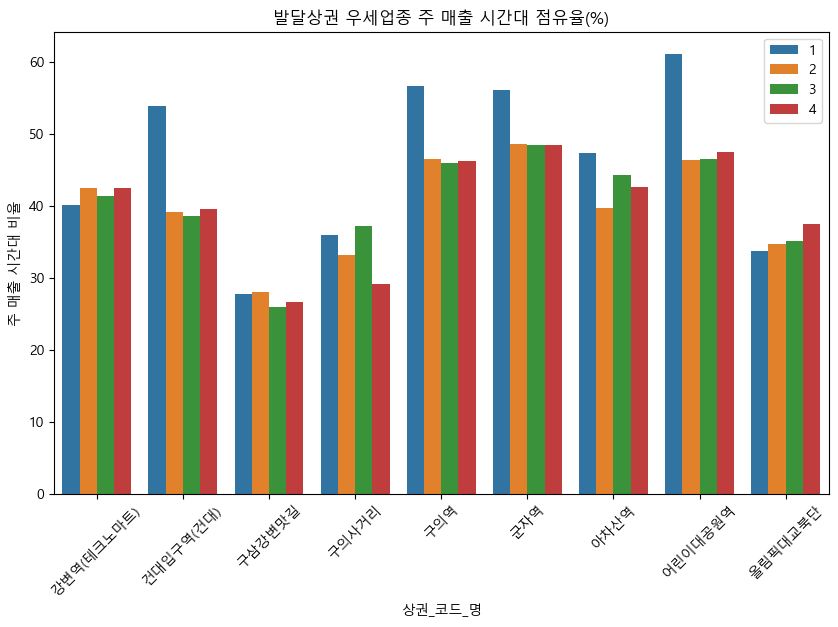

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x='상권_코드_명', y='주 매출 시간대 비율', hue = '기준_분기_코드', data = store_service_time)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("발달상권 우세업종 주 매출 시간대 점유율(%)")
plt.show() #강변역, 올림픽대교 북단을 제외한 상권에서는 특정 시간대의 매출액 점유율이 줄어드는 추세